<a href="https://colab.research.google.com/github/bytewithpalak/Polymer-Classification-using-ML/blob/main/Polymer_Classification_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [306]:
df= pd.read_csv('/content/polymers_dataset.csv')

In [307]:
df

,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20604,20604,C(Cl)CCCC(C)CC(Cl)CC(C)CC(Cl)C,plastic,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20605,20605,O[C@@]([C@]([H])(CO)O[C@](O)([H])[C@@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20606,20606,O[C@]([C@]([H])(CO)O[C@](O)([H])[C@]([H])1O)([...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20607,20607,OC(=O)[C@@]([H])(CS)NC(=O)[C@]([H])(CCSC)NC(=O...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
df.head()


,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20609 entries, 0 to 20608
Columns: 2051 entries, Unnamed: 0 to 2047
dtypes: int64(2049), object(2)
memory usage: 322.5+ MB


In [310]:
df.isnull().sum()

,0
Unnamed: 0,0
smiles,0
label,0
0,0
1,0
...,...
2043,0
2044,0
2045,0
2046,0


In [311]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (20609, 2051)


In [312]:
print("Columns of Dataset:",df.columns)

Columns of Dataset: Index(['Unnamed: 0', 'smiles', 'label', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2051)


In [313]:
 df.drop(columns=['Unnamed: 0'],inplace=True)

In [314]:
print(df.shape)


(20609, 2050)


In [315]:
X=df.drop(columns=['label','smiles'])
y=df['label']

In [316]:
X.shape

(20609, 2048)

In [317]:
y.shape

(20609,)

In [318]:
y

,label
0,plastic
1,peptide
2,oligosaccharide
3,plastic
4,plastic
...,...
20604,plastic
20605,oligosaccharide
20606,oligosaccharide
20607,peptide


In [319]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [321]:
print("Training data shape:", X_train.shape)

Training data shape: (12365, 2048)


In [322]:
print(X.shape)

(20609, 2048)


In [323]:
print("Testing data shape:", X_test.shape)

Testing data shape: (8244, 2048)


RANDOM FOREST CLASSIFIER


In [324]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [325]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [326]:
y_pred=model.predict(X_test)

In [327]:
y_pred

array([2, 0, 0, ..., 1, 2, 0])

In [328]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 1.0


In [329]:
print ("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2789
           2       1.00      1.00      1.00      2759

    accuracy                           1.00      8244
   macro avg       1.00      1.00      1.00      8244
weighted avg       1.00      1.00      1.00      8244



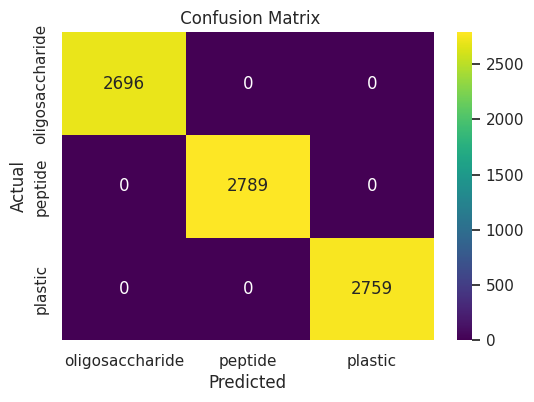

In [330]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

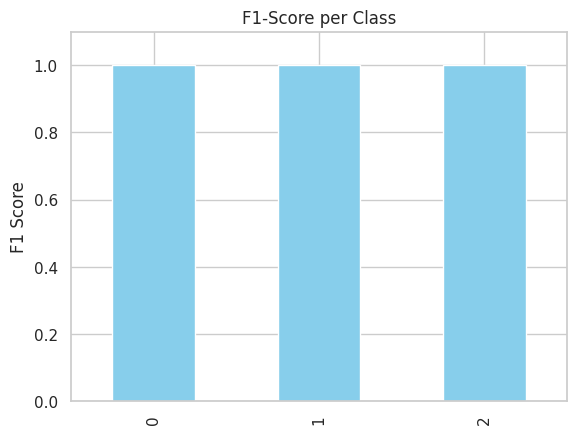

In [331]:
report = classification_report(y_test, y_pred, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='skyblue')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

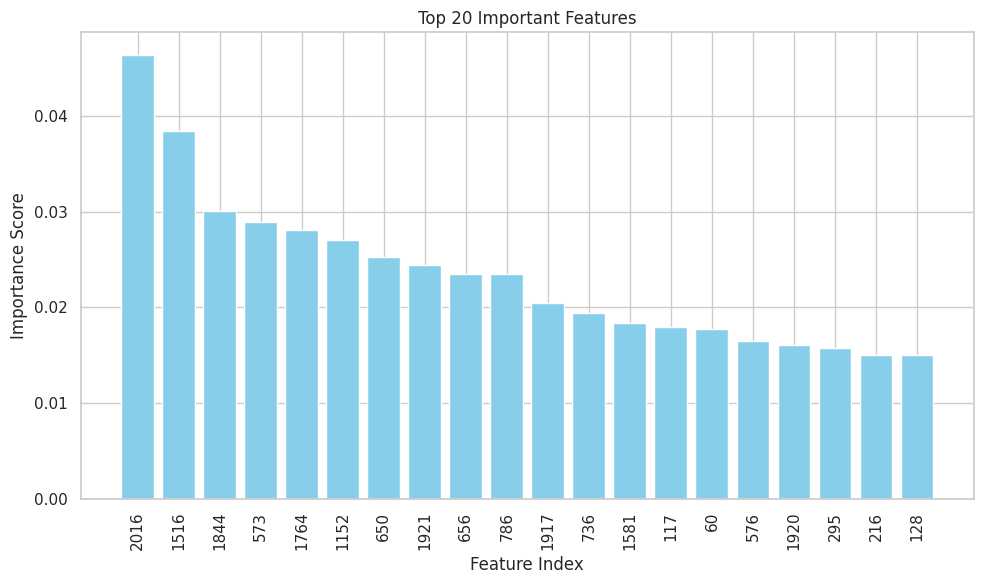

In [332]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

 KNN



In [333]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)



In [334]:
y_pred

array([2, 0, 0, ..., 1, 2, 0])

In [335]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9929645803008248

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      0.98      0.99      2789
           2       0.98      1.00      0.99      2759

    accuracy                           0.99      8244
   macro avg       0.99      0.99      0.99      8244
weighted avg       0.99      0.99      0.99      8244



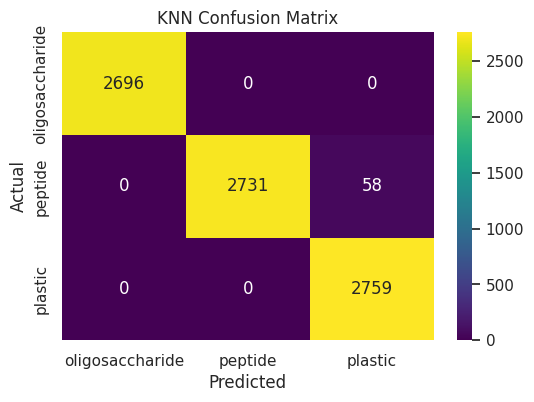

In [336]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

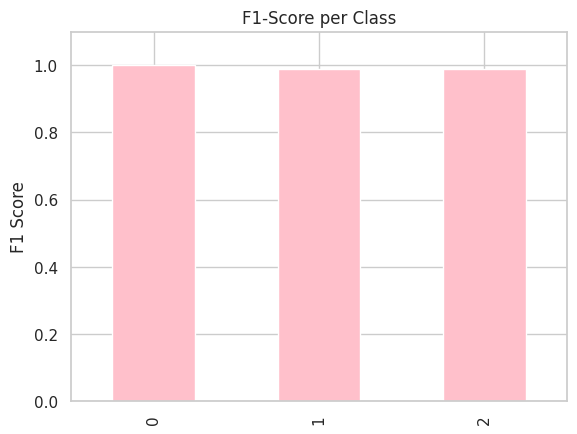

In [337]:
report = classification_report(y_test, y_pred_knn, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='pink')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

In [338]:
from sklearn.svm import SVC

svm= SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)

In [339]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2789
           2       1.00      1.00      1.00      2759

    accuracy                           1.00      8244
   macro avg       1.00      1.00      1.00      8244
weighted avg       1.00      1.00      1.00      8244



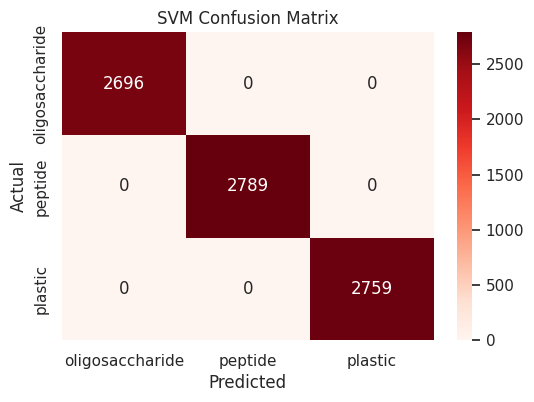

In [340]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [341]:
!pip install xgboost

In [ ]:
!pip install xgboost

In [344]:

import xgboost as xgb
xgb_model= xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_encoded)
y_pred_xgb = xgb_model.predict(X_test)

XGBoostError: [15:50:30] /__w/xgboost/xgboost/src/data/data.cc:522: Check failed: p_info->Size() % n_samples == 0 (8244 vs. 0) : Invalid size for `label`:(20609,1). n_samples:12365
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2c1a8c) [0x7c4aef8c1a8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5966d3) [0x7c4aefb966d3]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5b018e) [0x7c4aefbb018e]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5b1655) [0x7c4aefbb1655]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0x10b) [0x7c4aef7c9cab]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7c4be9ec3e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7c4be9ec0493]
  [bt] (7) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7c4beb2438c1]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x8ffe) [0x7c4beb242ffe]



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))


In [ ]:
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='flare',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
importances = xgb_model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:


results = {
    "Model": ["Random Forest", "KNN", "SVM", "XGBoost"],
    "Accuracy": [1.00, 0.975, 1.00, 1.00],
    "Notes": [
        "Perfect accuracy, interpretable",
        "Slightly lower, distance-based",
        "Perfect accuracy, clean margin",
        "Perfect accuracy, fast + scalable"
    ]
}

df_results = pd.DataFrame(results)
df_results


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
plt.ylim(0.95, 1.01)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:

!pip install streamlit joblib

code = """
import streamlit as st
import pandas as pd
import joblib

# Load saved model and tools
model = joblib.load("polymer_rf_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

st.title("🔬 Polymer Type Classifier")

uploaded_file = st.file_uploader("Upload your polymer CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader("📄 Input Data")
    st.write(df.head())

    # Preprocess uploaded data
    X_new = df.drop(columns=["smiles"], errors="ignore")
    X_scaled = scaler.transform(X_new)

    # Make predictions
    y_pred = model.predict(X_scaled)
    y_label = le.inverse_transform(y_pred)

    st.subheader("🧪 Predicted Polymer Types")
    st.write(pd.DataFrame(y_label, columns=["Predicted Type"]))
"""

with open("app.py", "w") as f:
    f.write(code)

print("✅ app.py file created!")
